<a href="https://colab.research.google.com/github/0xFAB10/Estudos/blob/main/Machine_learning_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd 'drive/My Drive/Machine Learning na Prática'
!pwd
!dir

/content/drive/My Drive/Machine Learning na Prática
/content/drive/My Drive/Machine Learning na Prática
gender_submission.csv  submission.csv  test.csv		train.csv
submission_1.csv       test_clean.csv  train_clean.csv


In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Porcentagem de sobrevivencia:  38.38383838383838


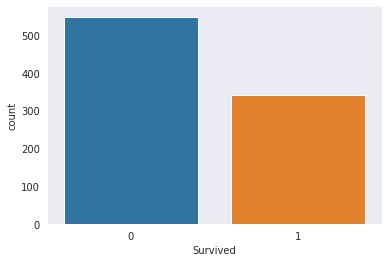

In [ ]:
print('Porcentagem de sobrevivencia: ', len(train_df[train_df.Survived == 1]) / len(train_df) * 100)
sns.set_style("dark")
sns.countplot(x='Survived', data = train_df)

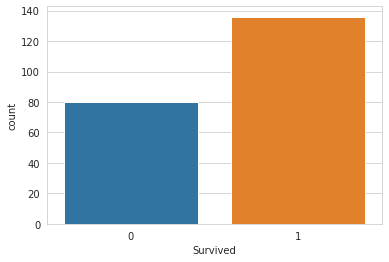

In [ ]:
sns.countplot(x='Survived', data = train_df[train_df.Pclass == 1])

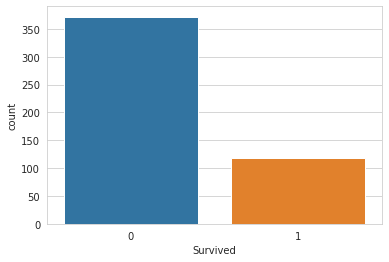

In [ ]:
sns.countplot(x='Survived', data = train_df[train_df.Pclass == 3])

In [ ]:
for column in train_df.columns:
  print(column, train_df[column].isnull().sum() )

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 0
SibSp 0
Parch 0
Ticket 0
Fare 0
Embarked 0
Title 0


In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
for column in test_df.columns:
  print(column, test_df[column].isnull().sum())

PassengerId 0
Pclass 0
Name 0
Sex 0
Age 0
SibSp 0
Parch 0
Ticket 0
Fare 0
Embarked 0


In [ ]:
train_df.loc[train_df['Embarked'].isnull(), 'Embarked'] = 0

test_df.loc[test_df['Fare'].isnull(), 'Fare'] = 0

In [ ]:
#Eliminate the column "Cabin" from the Datasets
train_df = train_df.drop('Cabin', axis=1)
test_df = test_df.drop('Cabin', axis=1)

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
#show the group with have this caracteritions
train_df.loc[train_df.Age.isnull()][train_df.SibSp > 0][train_df.Parch > 0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,S


In [ ]:
#search and change passengers with NaN in "Ages" using the median of hes class and sex
for df in [train_df, test_df]:
  for sex in ['male','female']:
    for pclass in [1,2,3]:
      median = df[df.Sex == sex][df.Pclass == pclass]['Age'].median()
      df.loc[(df.Age.isnull()) & (df.Sex == sex) & (df.Pclass == pclass), 'Age'] = median

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [ ]:
#verifing the categories of Sex
train_df.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
train_df[train_df.PassengerId == 66]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
65,66,1,3,"Moubarek, Master. Gerios",male,25.0,1,1,2661,15.2458,C


<h1>Extracting New Features

In [ ]:
#Using RegExr for creat a new column whit name "Title"
for dataset in [train_df, test_df]:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [ ]:
pd.crosstab(train_df.Title, train_df.Sex)

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [ ]:
for dataset in [train_df, test_df]:
  dataset.Title = dataset.Title.replace(['Lady', 'Capt', 'Sir', 'Don', 'Rev', 'Dr', 'Major', 'Col', 'Countess', 'Jonkheer'], 'Rare')
  dataset.Title = dataset.Title.replace(['Ms','Mlle'], 'Miss')
  dataset.Title = dataset.Title.replace(['Mme'], 'Mrs')
train_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [ ]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mirs': 3, 'Master': 4, 'Rare': 5}
for dataset in [train_df, test_df]:
  dataset.Title = dataset.Title.map(title_mapping)
  dataset.Title = dataset.Title.fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0


In [ ]:
train_df['FamilySize'] = train_df.SibSp + train_df.Parch + 1
test_df['FamilySize'] = test_df.SibSp + test_df.Parch + 1

train_df['IsAlone'] = 0
test_df['IsAlone'] = 0

train_df.loc[train_df.FamilySize == 1, 'IsAlone'] = 1
test_df.loc[test_df.FamilySize == 1, 'IsAlone'] = 1

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,5.0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,2.0,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S,2.0,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1.0,1,1


In [ ]:
#describe the column will be selected
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
#transform Fare in FareCat, with a maping
for dataset in [train_df, test_df]:
  dataset['FareCat'] = 0
  dataset.loc[dataset.Fare < 7.91, 'FareCat'] = 1
  dataset.loc[(dataset.Fare >= 7.91) & (dataset.Fare < 14.45), 'FareCat'] = 2
  dataset.loc[(dataset.Fare >= 14.45) & dataset.Fare < 31, 'FareCat'] = 3
  dataset.loc[dataset.Fare >= 31, 'FareCat'] = 4
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,2,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,2,0,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.0,1,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,2,0,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,5.0,1,1,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,2.0,1,1,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S,2.0,4,0,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1.0,1,1,3


In [ ]:
train_df.Embarked.unique()

array(['S', 'C', 'Q', 0], dtype=object)

In [ ]:
#Maping embarked
embarked_map = {'S':1, 'C':2, 'Q':3, 0:0}

for dataset in [train_df, test_df]:
  dataset['Embarked'] = dataset['Embarked'].map(embarked_map)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,1.0,2,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,0.0,2,0,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,2.0,1,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,0.0,2,0,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,1.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,1,5.0,1,1,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,2.0,1,1,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,1,2.0,4,0,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,2,1.0,1,1,3


In [ ]:
#delete columns 'Name' and 'Ticket'
train_df = train_df.drop(['Name', 'Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Ticket'], axis=1)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,1,0,3,male,22.0,1,0,7.2500,1,1.0,2,0,3
1,2,1,1,female,38.0,1,0,71.2833,2,0.0,2,0,4
2,3,1,3,female,26.0,0,0,7.9250,1,2.0,1,1,3
3,4,1,1,female,35.0,1,0,53.1000,1,0.0,2,0,4
4,5,0,3,male,35.0,0,0,8.0500,1,1.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,1,5.0,1,1,3
887,888,1,1,female,19.0,0,0,30.0000,1,2.0,1,1,3
888,889,0,3,female,21.5,1,2,23.4500,1,2.0,4,0,3
889,890,1,1,male,26.0,0,0,30.0000,2,1.0,1,1,3


In [ ]:
train_df.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
#Maping Sex
sex_map = {'male':0, 'female':1}

for dataset in [train_df, test_df]:
  dataset['Sex'] = dataset['Sex'].map(sex_map)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,1,0,3,0,22.0,1,0,7.2500,1,1.0,2,0,3
1,2,1,1,1,38.0,1,0,71.2833,2,0.0,2,0,4
2,3,1,3,1,26.0,0,0,7.9250,1,2.0,1,1,3
3,4,1,1,1,35.0,1,0,53.1000,1,0.0,2,0,4
4,5,0,3,0,35.0,0,0,8.0500,1,1.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,1,5.0,1,1,3
887,888,1,1,1,19.0,0,0,30.0000,1,2.0,1,1,3
888,889,0,3,1,21.5,1,2,23.4500,1,2.0,4,0,3
889,890,1,1,0,26.0,0,0,30.0000,2,1.0,1,1,3


<h1> Primeiro Algoritmo de Machine Learning

In [ ]:
X_train = train_df.drop(['Survived'], axis=1)
Y_train = train_df['Survived']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_pred = random_forest.predict(test_df)

In [ ]:
random_forest.score(X_train,Y_train)

0.9988776655443322

In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,1,0,3,0,22.0,1,0,7.2500,1,1.0,2,0,3
1,2,1,1,1,38.0,1,0,71.2833,2,0.0,2,0,4
2,3,1,3,1,26.0,0,0,7.9250,1,2.0,1,1,3
3,4,1,1,1,35.0,1,0,53.1000,1,0.0,2,0,4
4,5,0,3,0,35.0,0,0,8.0500,1,1.0,1,1,3
5,6,0,3,0,25.0,0,0,8.4583,3,1.0,1,1,3
6,7,0,1,0,54.0,0,0,51.8625,1,1.0,1,1,4
7,8,0,3,0,2.0,3,1,21.0750,1,4.0,5,0,3
8,9,1,3,1,27.0,0,2,11.1333,1,0.0,3,0,3
9,10,1,2,1,14.0,1,0,30.0708,2,0.0,2,0,3


In [ ]:
random_forest.predict(X_train.head(10))

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,1,0,3,0,22.0,1,0,7.2500,1,1.0,2,0,3
1,2,1,1,1,38.0,1,0,71.2833,2,0.0,2,0,4
2,3,1,3,1,26.0,0,0,7.9250,1,2.0,1,1,3
3,4,1,1,1,35.0,1,0,53.1000,1,0.0,2,0,4
4,5,0,3,0,35.0,0,0,8.0500,1,1.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,1,5.0,1,1,3
887,888,1,1,1,19.0,0,0,30.0000,1,2.0,1,1,3
888,889,0,3,1,21.5,1,2,23.4500,1,2.0,4,0,3
889,890,1,1,0,26.0,0,0,30.0000,2,1.0,1,1,3
